# Image Classification 
## Rob Lee NYC Capstone DSI+

In [13]:
import os
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.utils import np_utils

os.environ['KERAS_BAKEND'] = 'tensorflow'
%matplotlib inline

# Import Data

In [2]:
# Import train and test data.
trainFile = 'fashionmnist/fashion-mnist_train.csv'
testFile = 'fashionmnist/fashion-mnist_test.csv'

# Create dataframes and X(feature) matrix and target vector
df_train = pd.read_csv(trainFile)
df_test = pd.read_csv(testFile)

X_train = df_train.drop('label', axis=1)
y_train = df_train['label']

X_test = df_test.drop('label', axis=1)
y_test = df_test['label']

In [3]:
# What the train data looks like.
df_train.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# EDA

In [4]:
# Training set has 60,000 images with 784 pixels (28 x 28).
X_train.shape

pixel_num = X_train.shape[1]

In [21]:
# 10 distinct labels (categories).
set(df_train['label'])

label_num = len(set(df_train['label']))

Category: 0


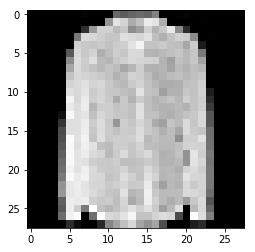

Category: 1


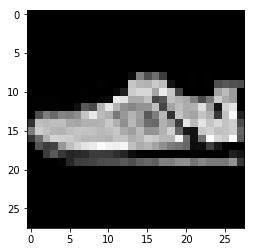

Category: 2


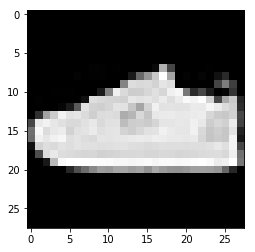

Category: 3


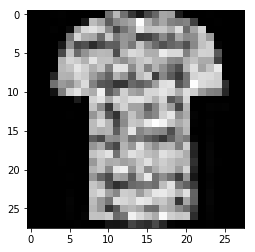

Category: 4


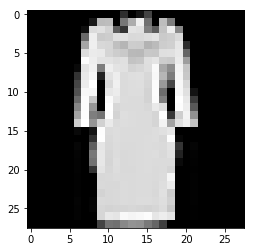

Category: 5


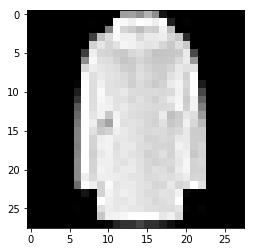

Category: 6


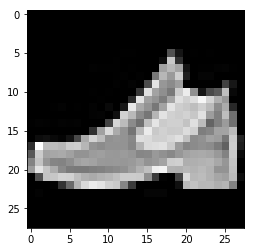

Category: 7


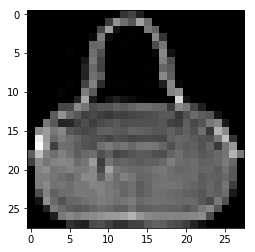

Category: 8


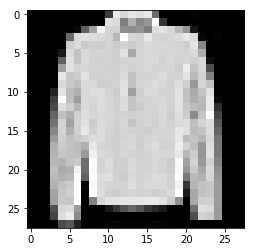

Category: 9


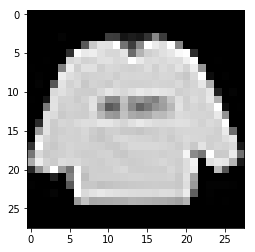

In [6]:
def printImg(index):
    '''This function takes an index and prints the first image in the "X_train" dataframe with that index.'''
    for ind, row in enumerate(df_train['label']):
        if index == row:
            plt.imshow(X_train.iloc[ind-1].values.reshape(28,28), cmap=plt.get_cmap('gray'))
            plt.show()
            break

# Print an image from each label.
for i in range(10):
    print('Category: ' + str(i))
    printImg(i)

In [103]:
# Training set has 6,000 images of each class.
df_train.groupby('label').count().iloc[:,0]

label
0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
Name: pixel1, dtype: int64

In [7]:
# Normalize data into 0 - 1 scale.
X_train = X_train / 255
X_test = X_test / 255

In [8]:
# Transform pixel dataframe into arrays.
X_train_arr = X_train.values
X_test_arr = X_test.values

In [15]:
# One hot encode target vectors.
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# Modeling

## In Progress:

In [9]:
from keras.models import Sequential
from keras.layers import Dense

In [23]:
# Instantiate Sequential.
fc_model = Sequential()

# First layer.
fc_model.add(Dense(512, input_dim=pixel_num, init='normal', activation = 'relu', name='layer_1'))

# Second layer.
fc_model.add(Dense(label_num, init='normal', activation='softmax', name='layer_2'))

# Compile model.
fc_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/Users/robshlee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, input_dim=784, activation="relu", name="layer_1", kernel_initializer="normal")`
  """
/Users/robshlee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="softmax", name="layer_2", kernel_initializer="normal")`
  


In [24]:
fc_model.fit(X_train_arr, y_train, validation_data=(X_test_arr, y_test), epochs=10, batch_size=200, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 4s - loss: 0.5348 - acc: 0.8147 - val_loss: 0.4139 - val_acc: 0.8510
Epoch 2/10
 - 4s - loss: 0.3899 - acc: 0.8620 - val_loss: 0.3672 - val_acc: 0.8720
Epoch 3/10
 - 4s - loss: 0.3474 - acc: 0.8759 - val_loss: 0.3576 - val_acc: 0.8712
Epoch 4/10
 - 4s - loss: 0.3202 - acc: 0.8851 - val_loss: 0.3318 - val_acc: 0.8788
Epoch 5/10
 - 4s - loss: 0.2986 - acc: 0.8914 - val_loss: 0.3082 - val_acc: 0.8876
Epoch 6/10
 - 4s - loss: 0.2847 - acc: 0.8966 - val_loss: 0.3022 - val_acc: 0.8882
Epoch 7/10
 - 5s - loss: 0.2702 - acc: 0.9005 - val_loss: 0.3003 - val_acc: 0.8892
Epoch 8/10
 - 5s - loss: 0.2588 - acc: 0.9049 - val_loss: 0.3019 - val_acc: 0.8867
Epoch 9/10
 - 5s - loss: 0.2439 - acc: 0.9097 - val_loss: 0.2840 - val_acc: 0.8960
Epoch 10/10
 - 5s - loss: 0.2358 - acc: 0.9133 - val_loss: 0.2901 - val_acc: 0.8937
